# Tutorial 14: Mean Ulcer Index Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5548%,0.0212%,0.1592%,-1.5646%,0.3107%,-1.0155%,-0.7653%,-3.0049%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0569%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6036%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1367%,-0.7308%,-0.1449%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


## 2. Estimating Mean Ulcer Index Portfolios

### 2.1 Calculating the portfolio that maximizes Ulcer Performance Index (UPI) ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'UCI' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.3434%,4.3358%,0.0000%,0.0000%,18.1621%,0.0000%,1.0071%,0.0000%,0.0000%,...,3.8883%,0.0000%,0.0000%,0.0000%,0.0000%,0.4941%,0.0000%,0.0000%,8.3242%,0.0000%


### 울서 인덱스(Ulcer Index)

울서 인덱스(Ulcer Index, UI)는 자산이나 포트폴리오의 리스크를 측정하는 데 사용되는 지표로, 투자자가 경험하는 드로우다운(Drawdown)의 깊이와 지속 시간을 고려합니다. 주로 자산의 가격 하락에 따른 투자자의 심리적 스트레스를 측정하기 위해 개발되었습니다.

#### 울서 인덱스의 정의

울서 인덱스는 특정 기간 동안의 자산 가격이 최고점에서 얼마나 떨어지는지를 측정하는 지표로, 다음과 같은 수식을 사용하여 계산됩니다:

1. **드로우다운(Drawdown)**:
   - 드로우다운은 특정 시점에서의 자산 가격이 이전 최고점에서 얼마나 하락했는지를 나타냅니다.
   - 수식: 
     $$
     \text{Drawdown}(t) = \frac{P_{\text{peak}} - P_t}{P_{\text{peak}}} \times 100
     $$
     여기서 $ P_{\text{peak}} $는 이전 최고점, $ P_t $는 시간 $ t $에서의 자산 가격입니다.

2. **울서 인덱스(Ulcer Index)**:
   - 일정 기간 동안 드로우다운의 평균 제곱근(RMS)을 계산하여 울서 인덱스를 구합니다.
   - 수식:
     $$
     \text{Ulcer Index} = \sqrt{\frac{\sum_{t=1}^T \text{Drawdown}(t)^2}{T}}
     $$
     여기서 $ T $는 기간의 길이입니다.

울서 인덱스는 드로우다운의 크기뿐만 아니라 그 빈도와 지속 시간도 고려하므로, 투자자가 경험하는 실제 리스크를 더 잘 반영합니다.

#### 울서 인덱스의 특징

- **드로우다운 기반**: 울서 인덱스는 자산의 최고점에서의 하락폭을 기반으로 하므로, 투자자에게 심리적 스트레스를 주는 요인을 직접적으로 측정합니다.
- **심리적 리스크 측정**: 자산 가격의 하락에 따른 투자자의 심리적 스트레스를 측정하기 위해 고안되었습니다.
- **빈도와 지속 시간 고려**: 단순히 하락폭만 고려하는 것이 아니라, 하락이 발생하는 빈도와 지속 시간도 반영합니다.

#### 울서 인덱스의 사용 예

1. **드로우다운 계산**:
   - 예를 들어, 특정 자산의 가격이 다음과 같다고 가정합니다: $[100, 105, 102, 98, 95, 97, 99]$
   - 각 시점에서의 드로우다운을 계산합니다:
     $$
     \text{Drawdown} = [0, 0, 2.86, 6.67, 9.52, 7.62, 5.71]
     $$

2. **울서 인덱스 계산**:
   - 드로우다운의 평균 제곱근을 계산하여 울서 인덱스를 구합니다:
     $$
     \text{Ulcer Index} = \sqrt{\frac{0^2 + 0^2 + 2.86^2 + 6.67^2 + 9.52^2 + 7.62^2 + 5.71^2}{7}} \approx 5.39
     $$

### 울서 인덱스 계산 코드 예

다음은 Python을 사용하여 울서 인덱스를 계산하는 코드 예제입니다:

```python
import numpy as np

def ulcer_index(prices):
    peak = np.maximum.accumulate(prices)
    drawdown = (peak - prices) / peak * 100
    ui = np.sqrt(np.mean(drawdown**2))
    return ui

# 예제 데이터 (가격 시계열)
prices = np.array([100, 105, 102, 98, 95, 97, 99])

# 울서 인덱스 계산
ui = ulcer_index(prices)
print(f"Ulcer Index: {ui:.2f}")
```

### 울서 인덱스의 장점과 단점

#### 장점
- **심리적 리스크 반영**: 투자자가 실제로 경험하는 심리적 스트레스를 반영합니다.
- **드로우다운의 크기와 빈도 고려**: 단순한 변동성 측정보다 더 직관적인 리스크 측정이 가능합니다.

#### 단점
- **과거 데이터 의존**: 과거 데이터에 기반하므로 미래의 리스크를 완벽하게 예측할 수는 없습니다.
- **복잡성**: 다른 리스크 지표보다 계산이 더 복잡할 수 있습니다.

### 요약

울서 인덱스는 자산의 최고점에서의 하락폭을 기반으로 투자자가 경험하는 심리적 스트레스를 측정하는 지표입니다. 드로우다운의 크기와 빈도, 지속 시간을 고려하여 리스크를 더 직관적으로 반영하며, 포트폴리오 최적화 및 리스크 관리에서 중요한 역할을 할 수 있습니다.

### 2.2 Plotting portfolio composition

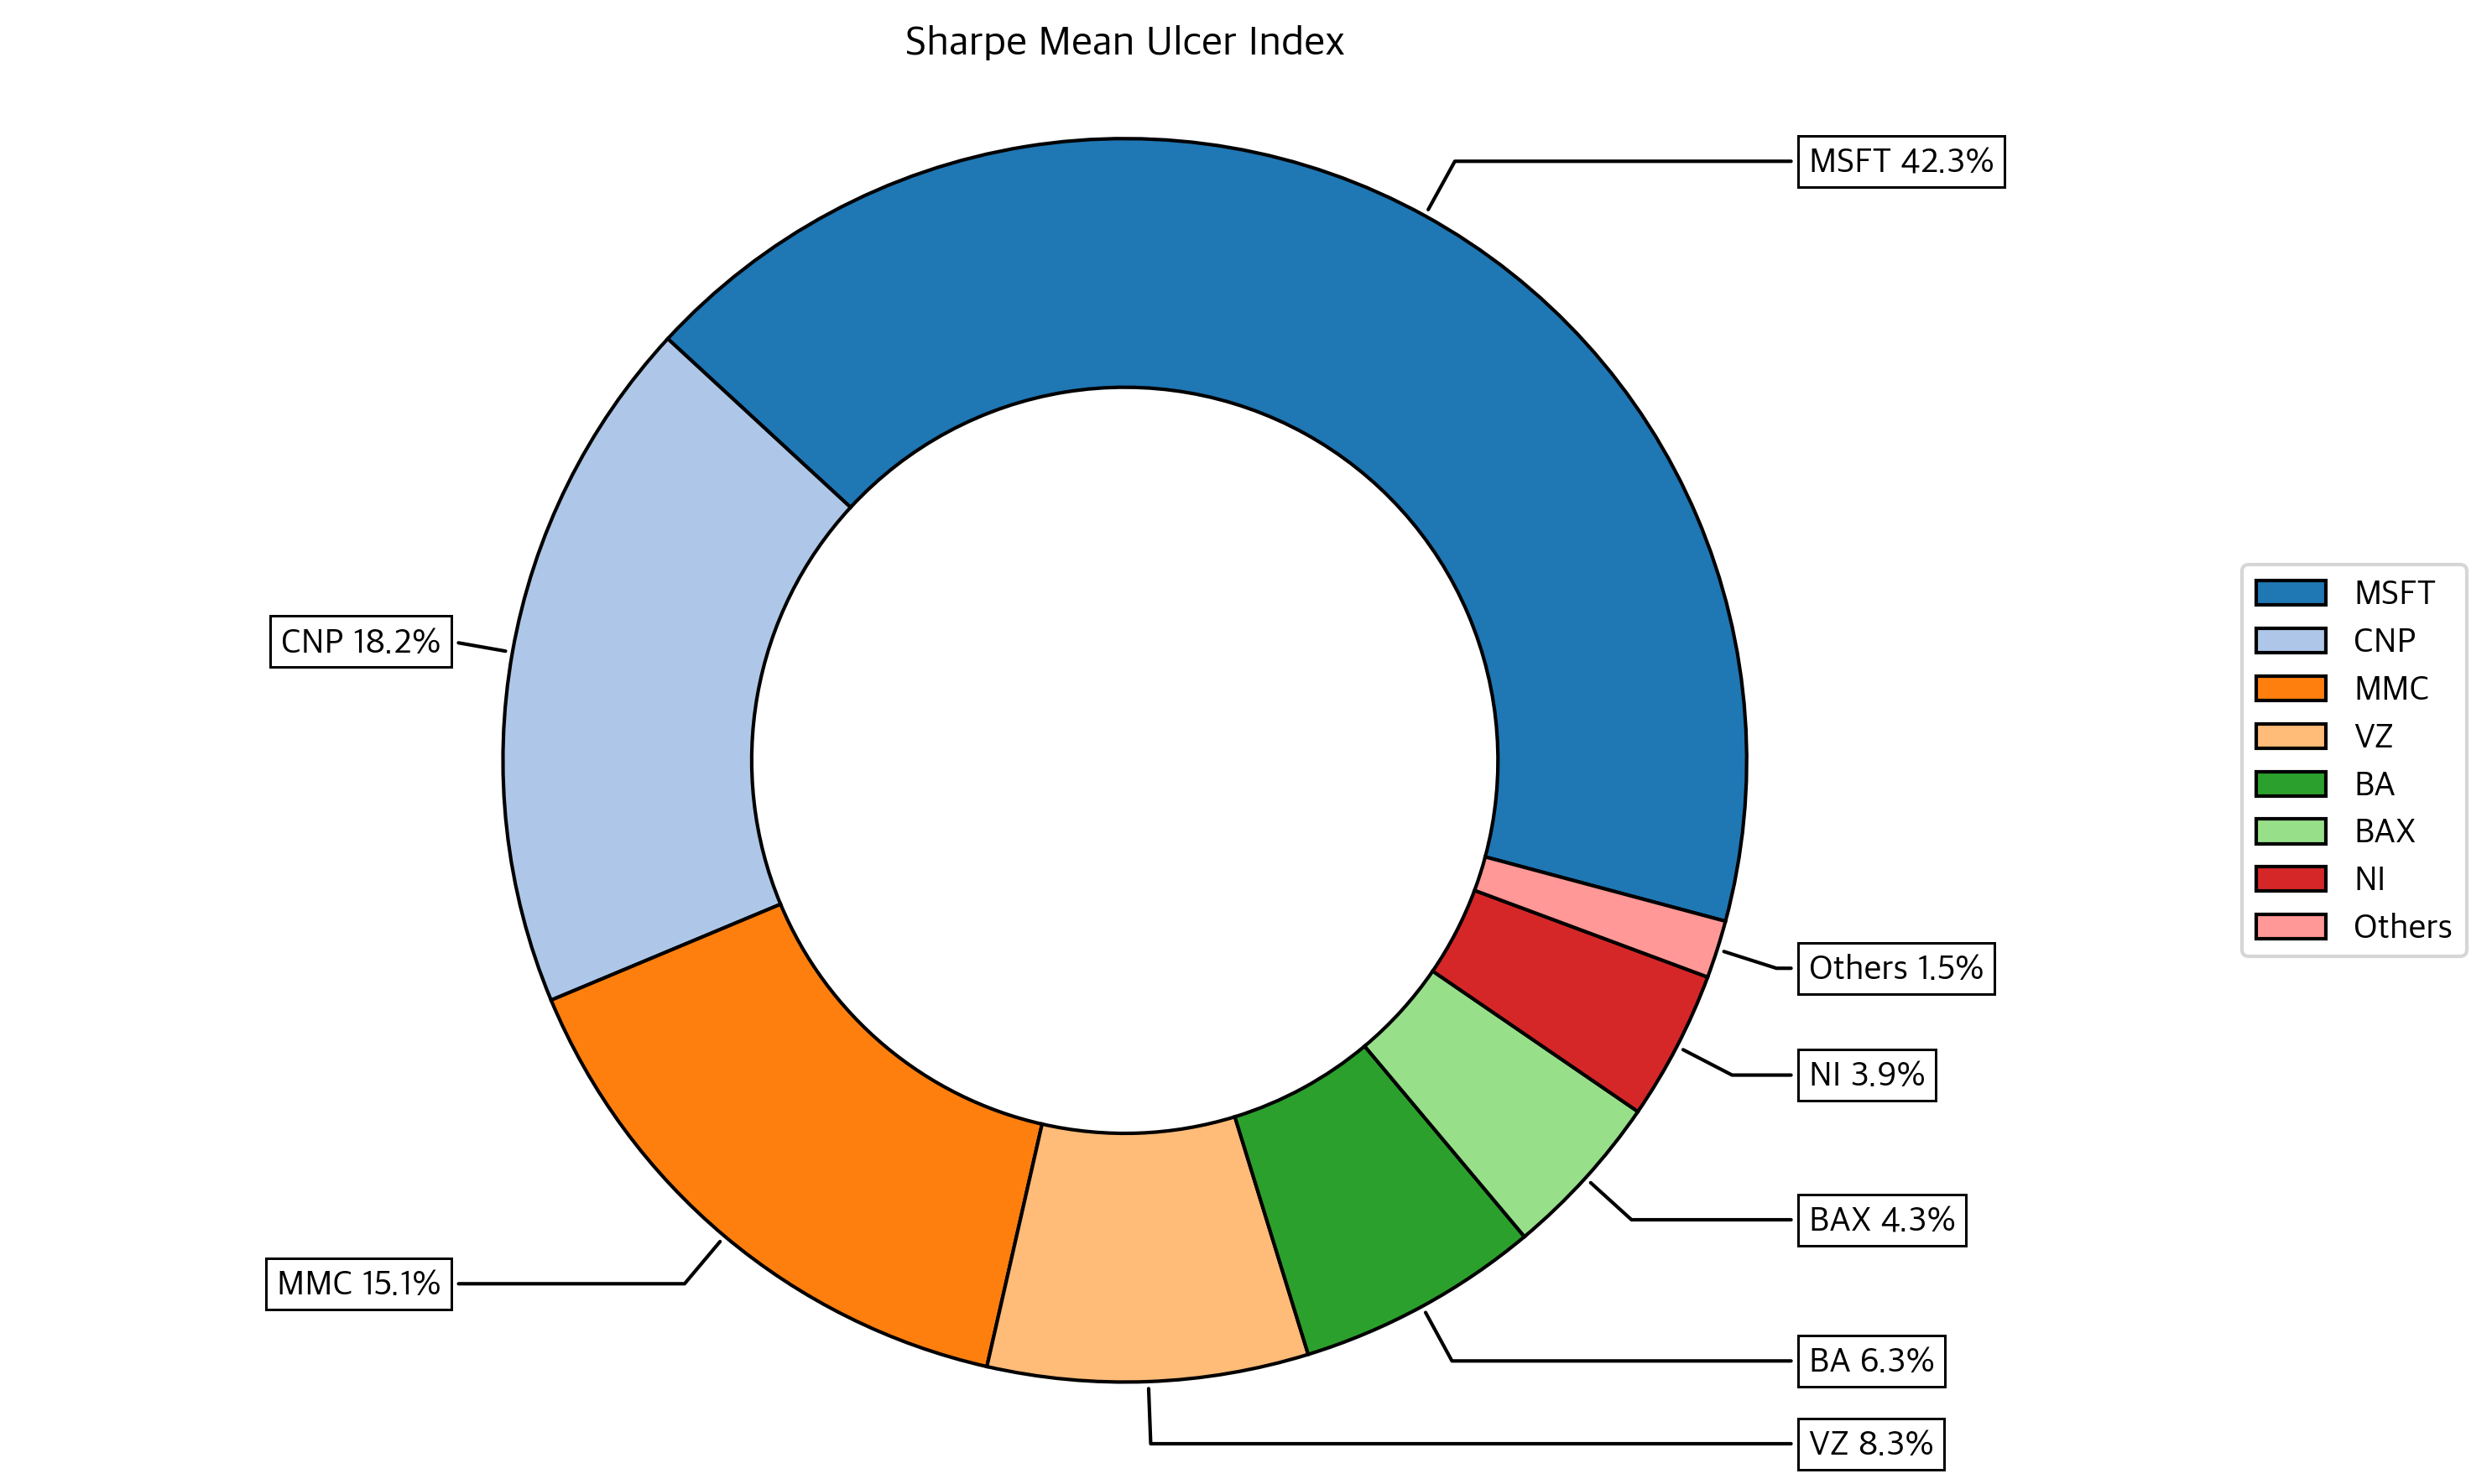

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Ulcer Index', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [5]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,4.5188%,3.0976%,0.0000%,0.0000%,16.6413%,0.0000%,0.0000%,0.0000%,0.0000%,...,2.1230%,0.0000%,8.7177%,0.0000%,7.4924%,0.0000%,0.0000%,0.0000%,10.8053%,6.9958%
1,0.0000%,7.8955%,3.5489%,0.0000%,0.0000%,17.4923%,0.0000%,0.1943%,0.0000%,0.0000%,...,3.4592%,0.0000%,2.6676%,0.0000%,4.4548%,0.0000%,0.0000%,0.0000%,8.5584%,0.0000%
2,0.0000%,7.4222%,4.1800%,0.0000%,0.0000%,18.3733%,0.0000%,0.3504%,0.0000%,0.0000%,...,4.0183%,0.0000%,0.0000%,0.0000%,2.1291%,0.0000%,0.0000%,0.0000%,8.2744%,0.0000%
3,0.0000%,5.7704%,4.1238%,0.0000%,0.0000%,17.9971%,0.0000%,0.8272%,0.0000%,0.0000%,...,3.8011%,0.0000%,0.0000%,0.0000%,0.0000%,0.8105%,0.0000%,0.0000%,8.4259%,0.0000%
4,0.0000%,5.1139%,3.5056%,0.0000%,0.0000%,17.7289%,0.0000%,0.4869%,0.0000%,0.0000%,...,3.8856%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,6.9581%,0.0000%


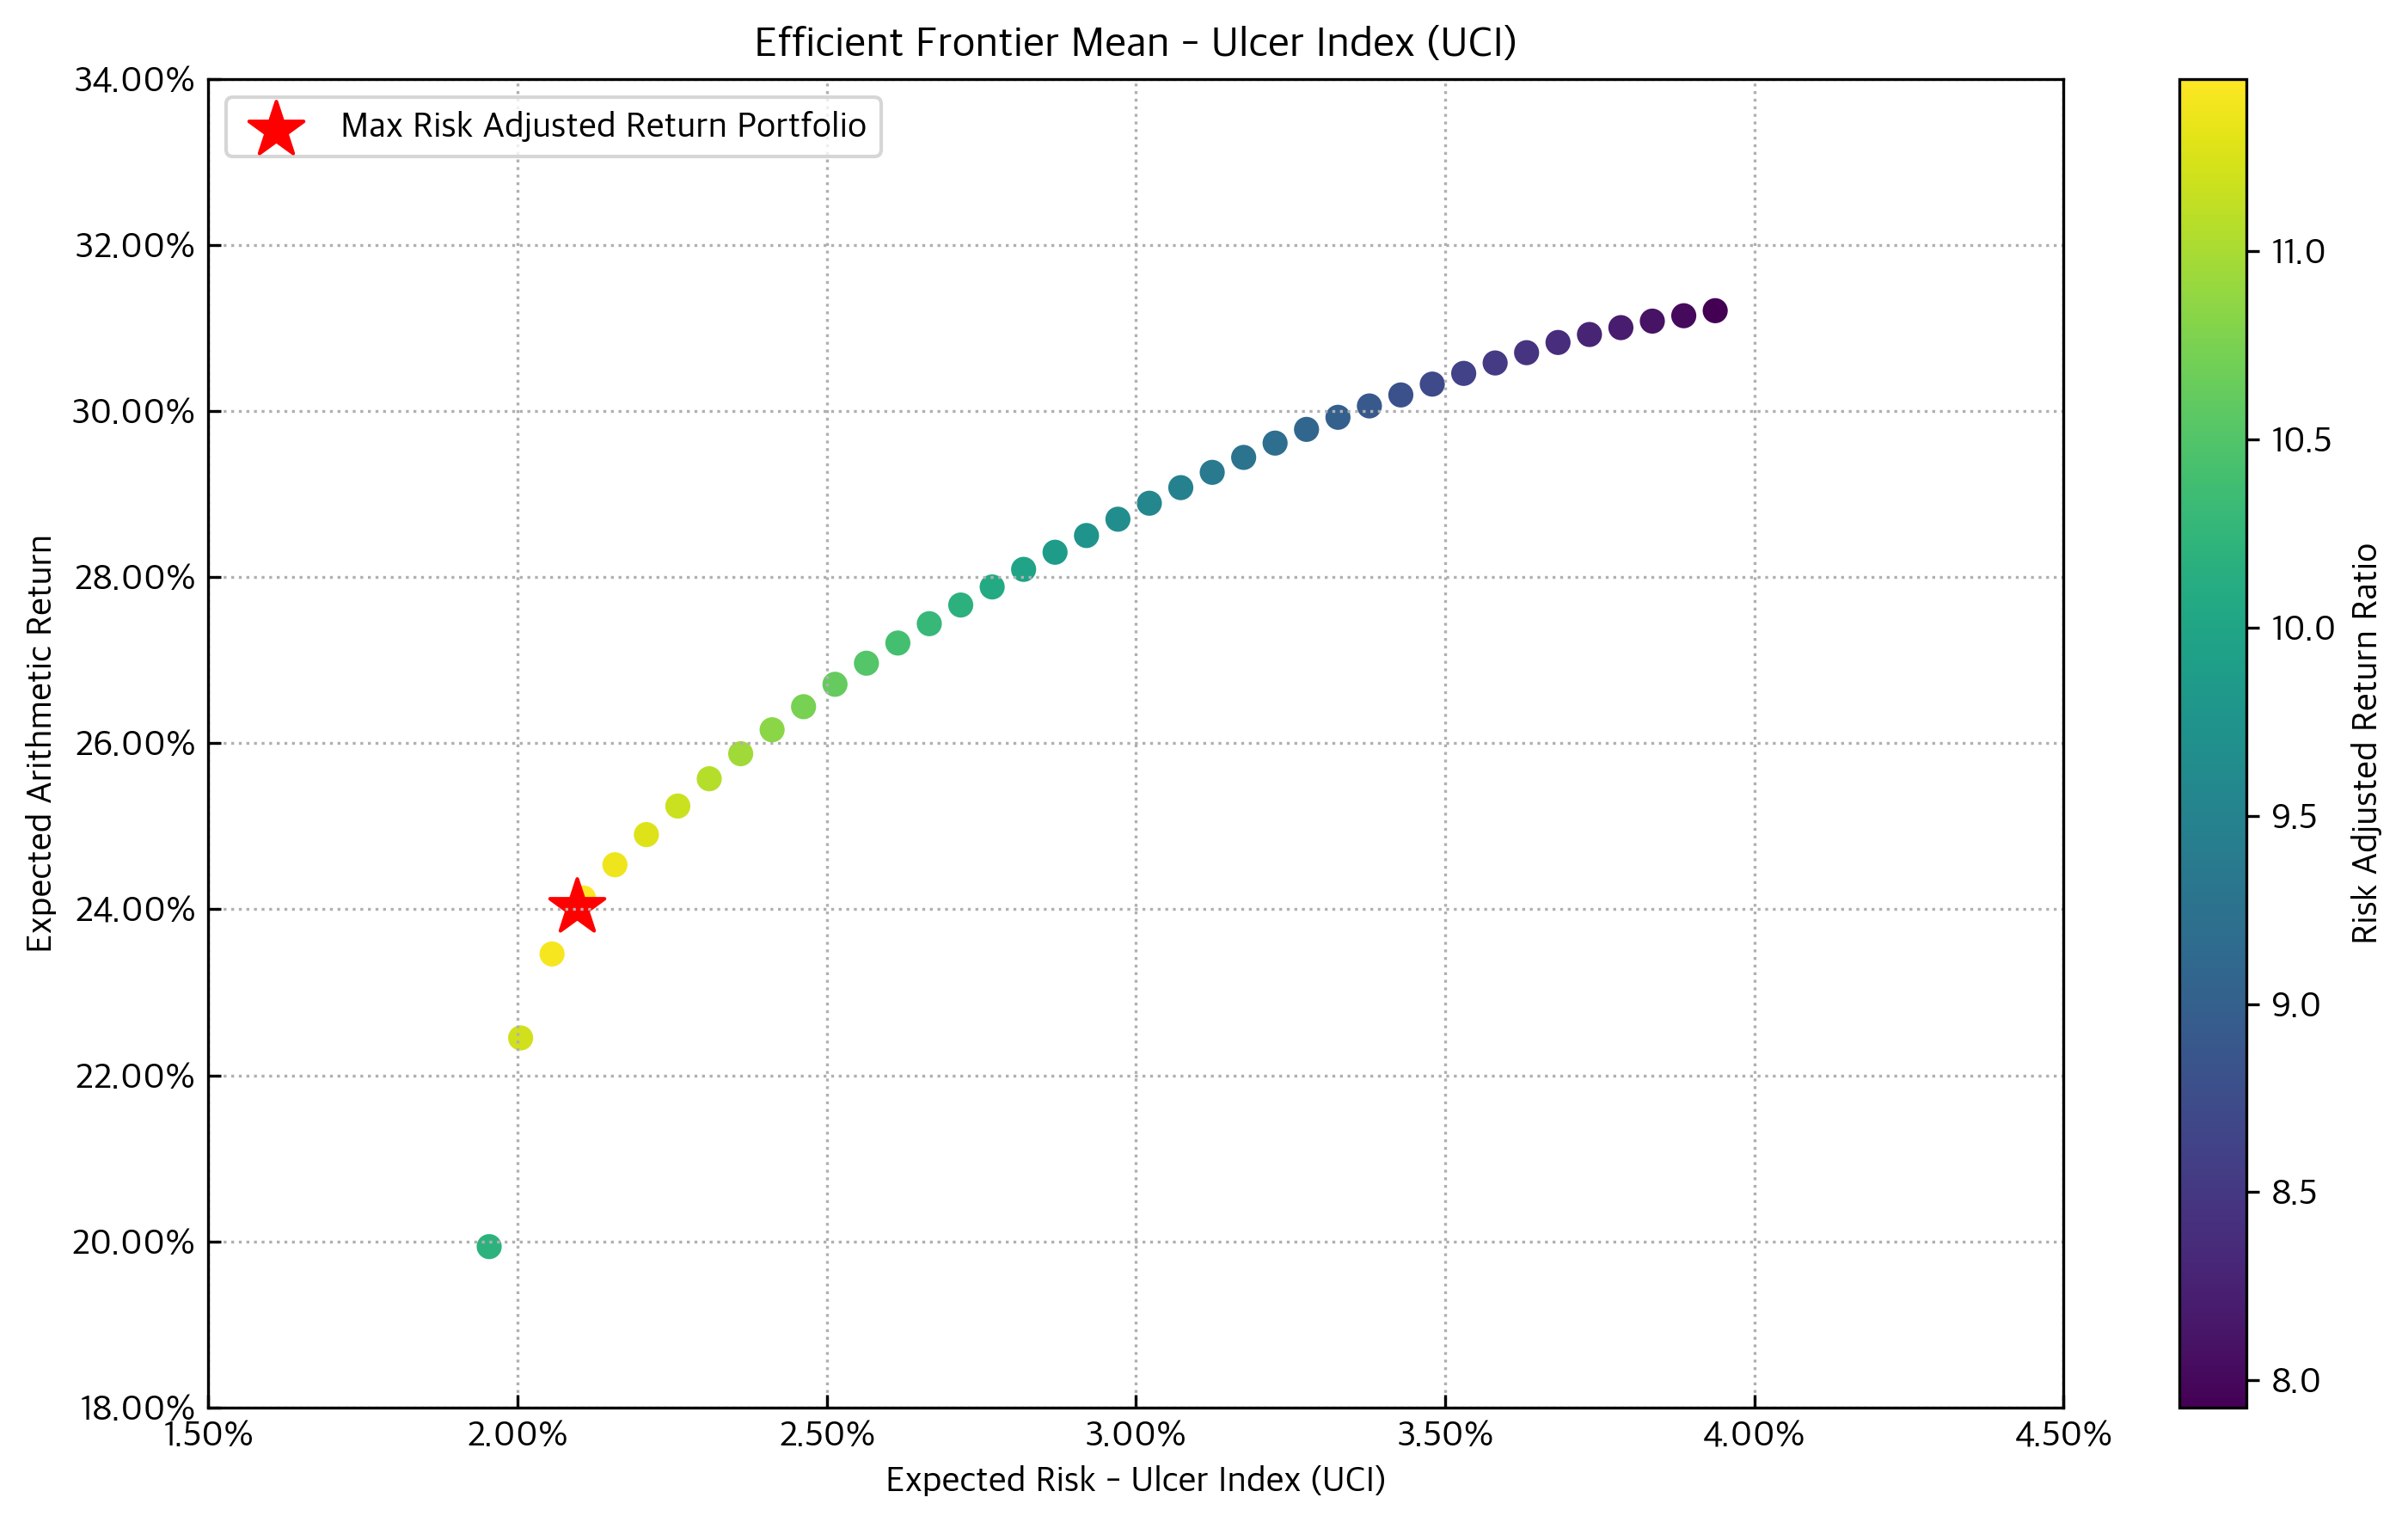

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

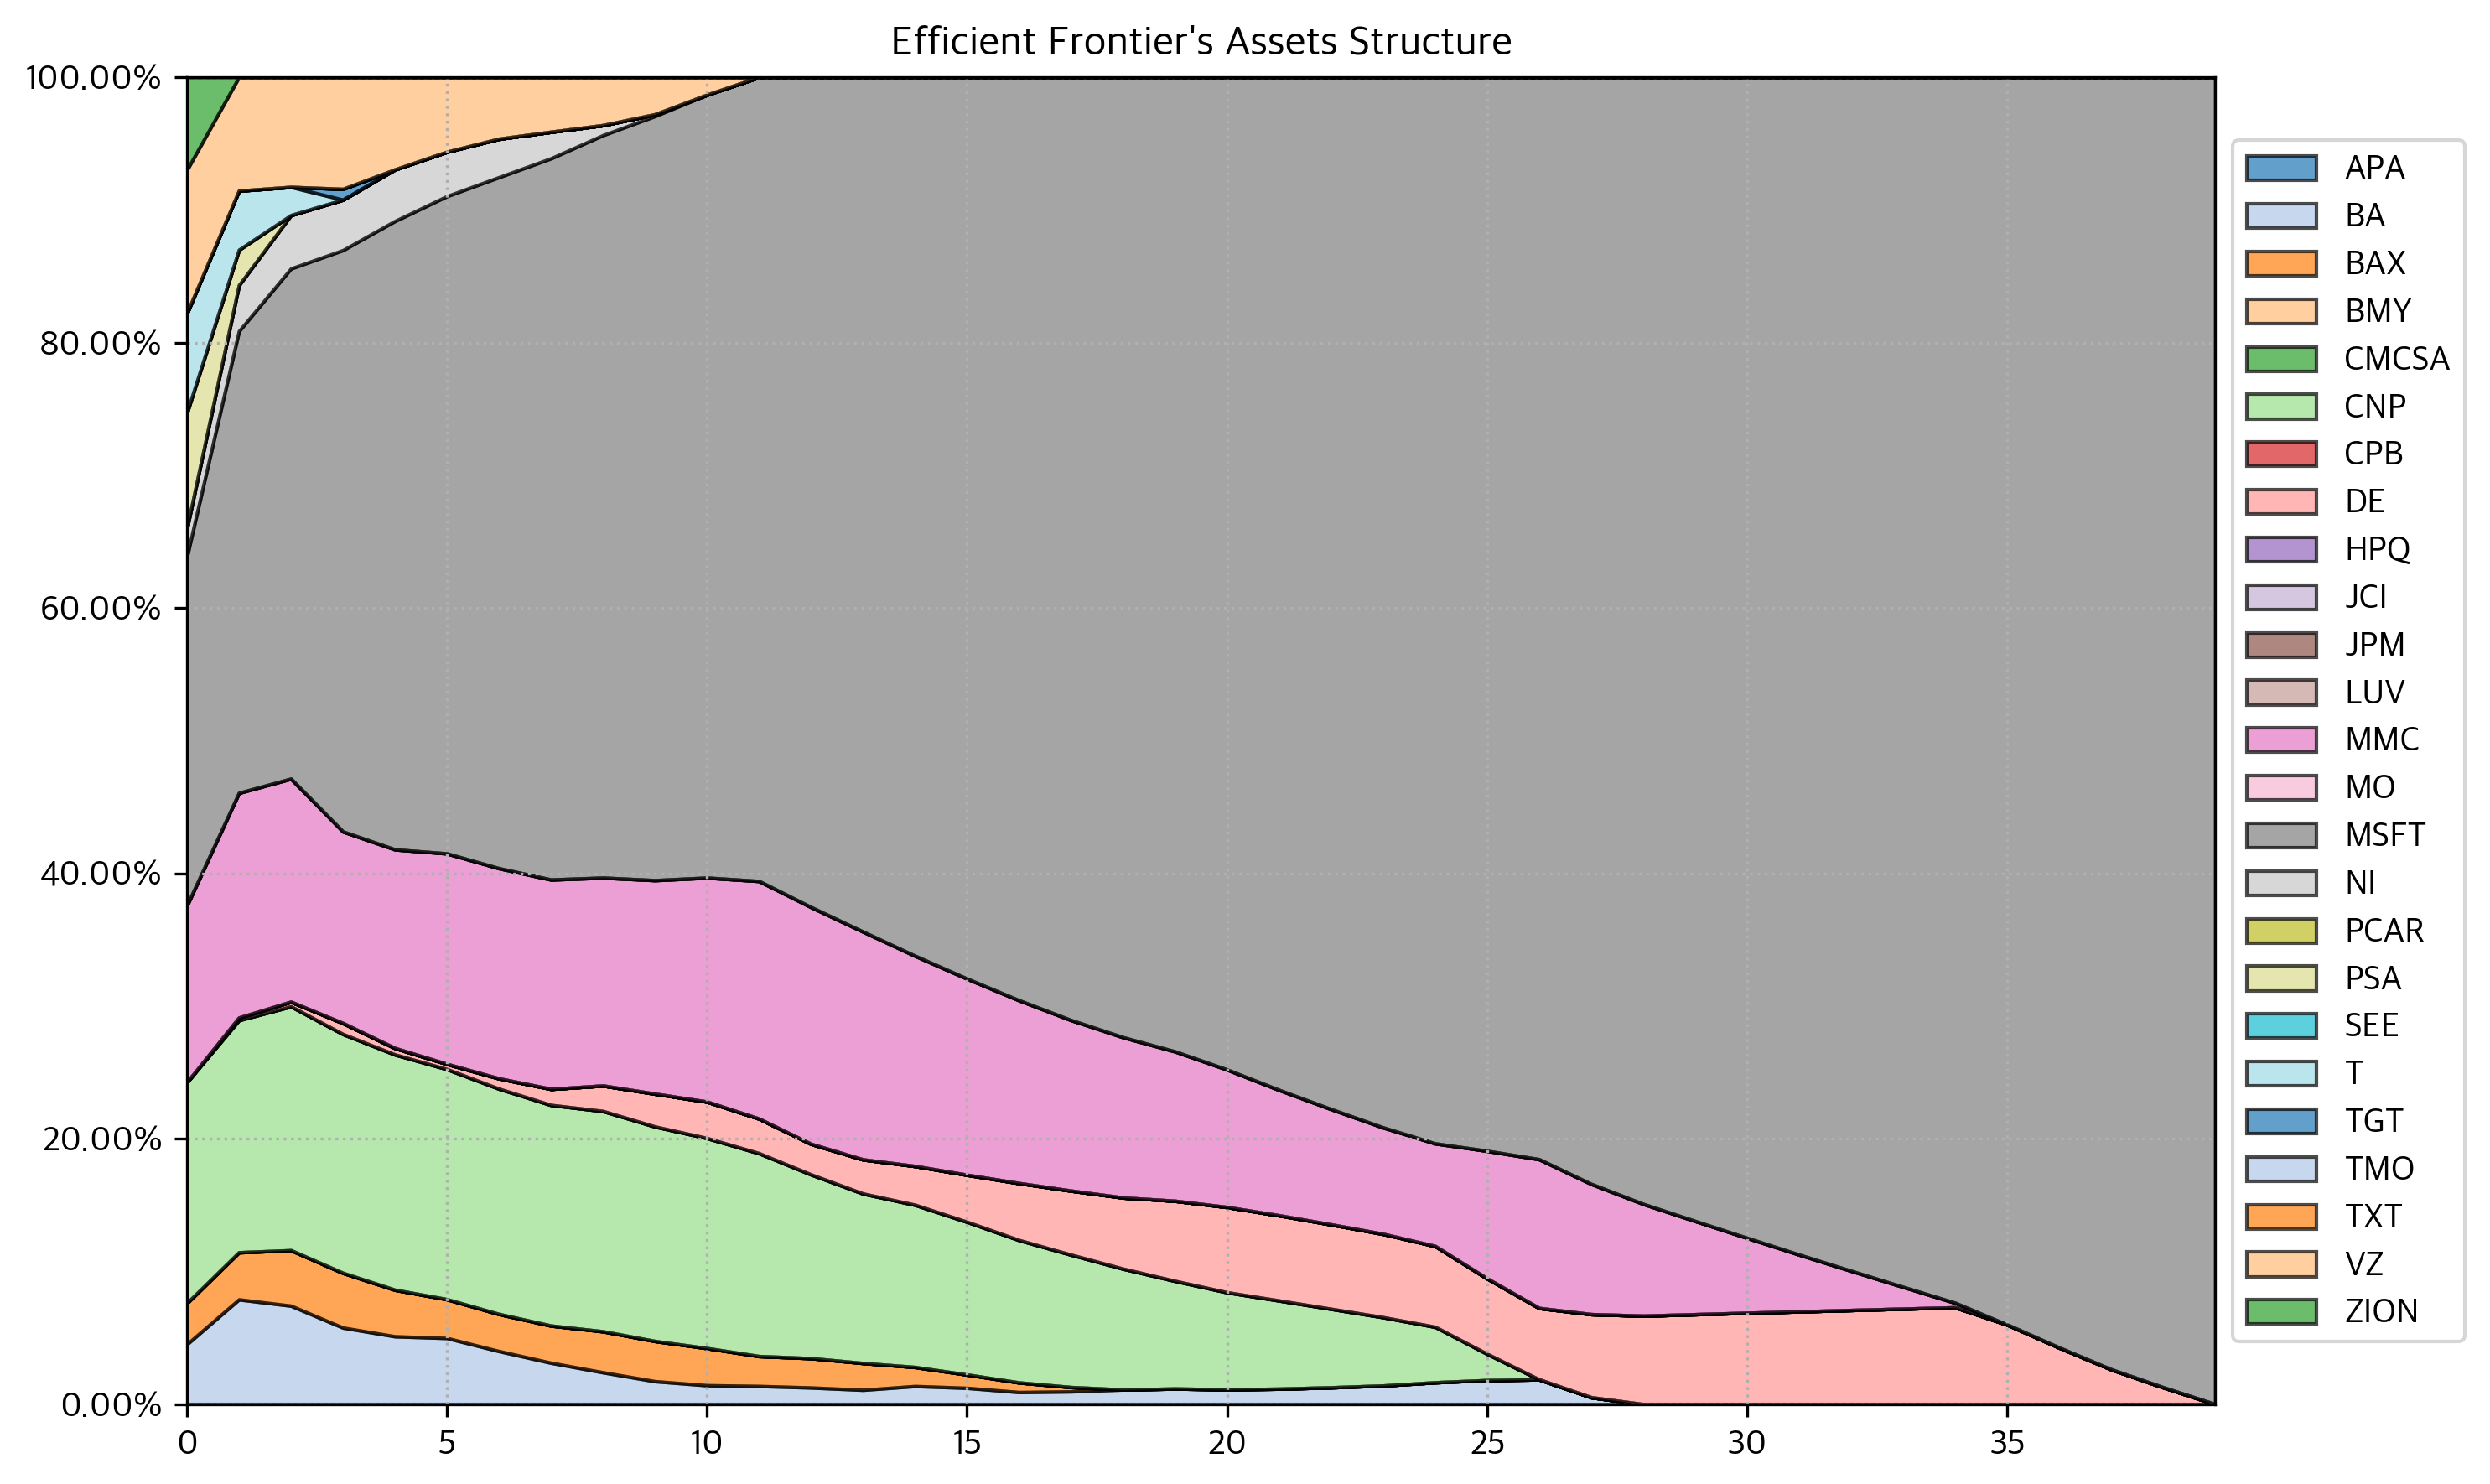

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Ulcer Index

### 3.1 Calculating the risk parity portfolio for Ulcer Index.

In [8]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.3434%,4.3358%,0.0000%,0.0000%,18.1621%,0.0000%,1.0071%,0.0000%,0.0000%,...,3.8883%,0.0000%,0.0000%,0.0000%,0.0000%,0.4941%,0.0000%,0.0000%,8.3242%,0.0000%


### 3.2 Plotting portfolio composition

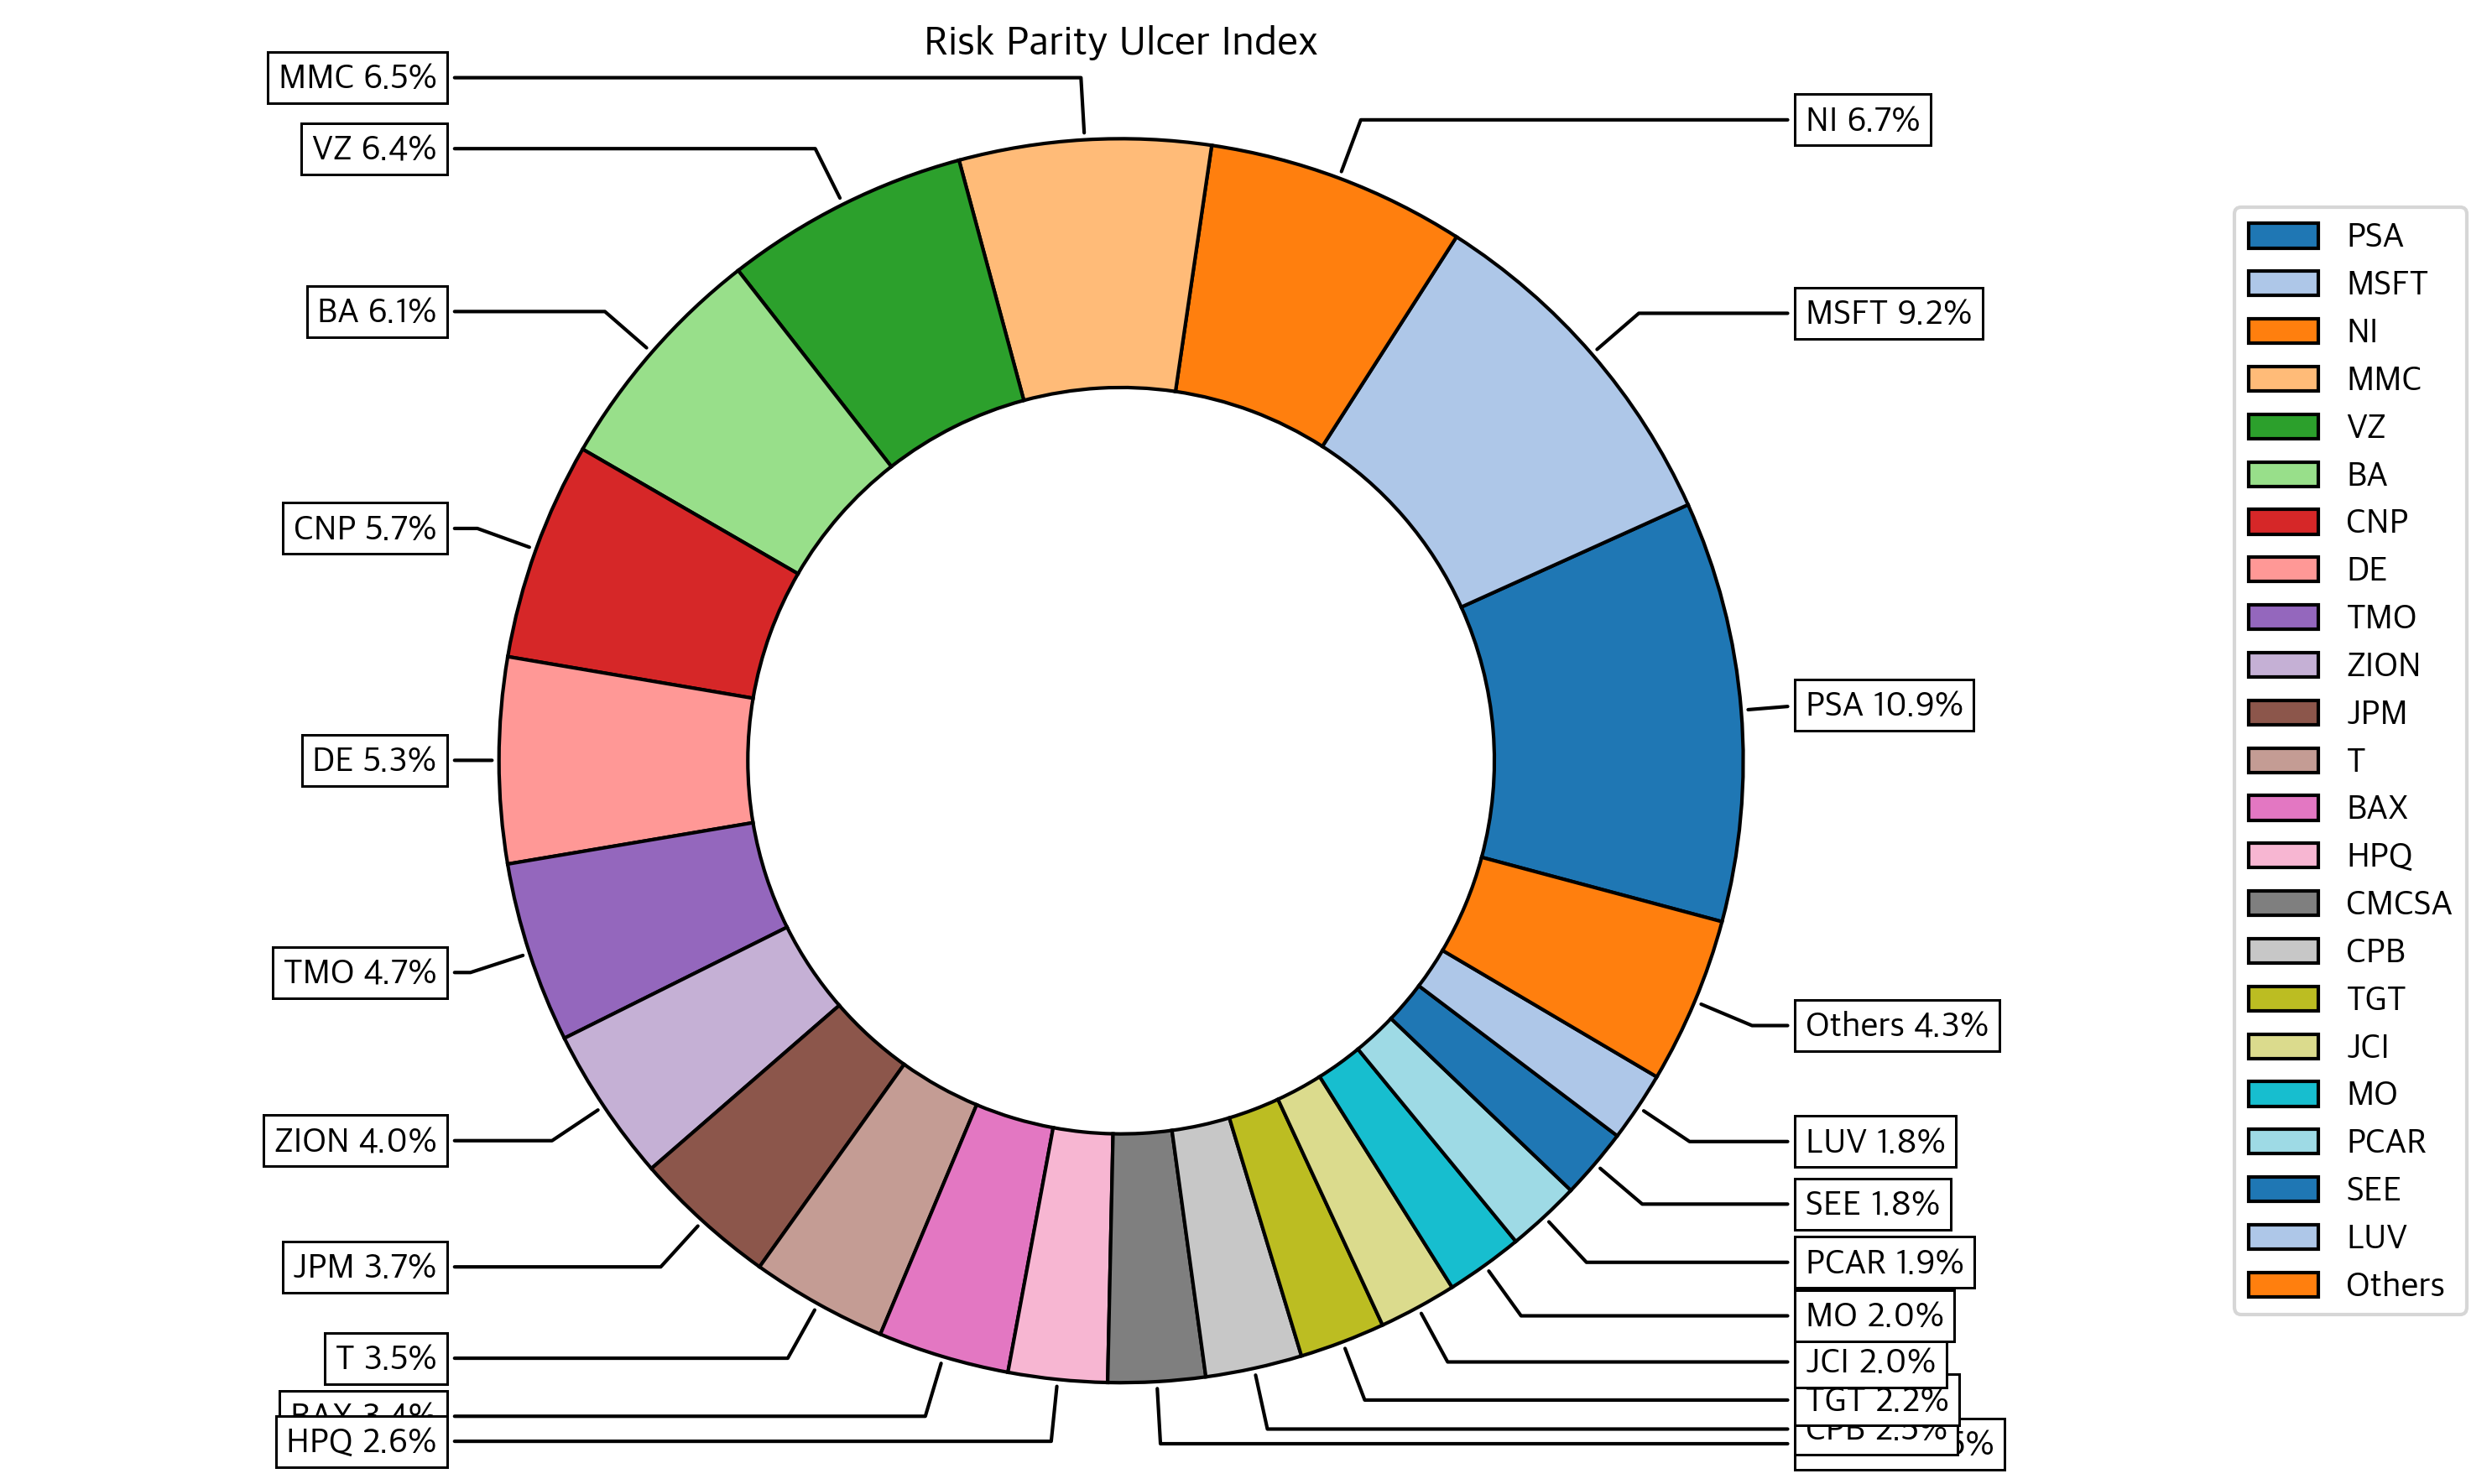

In [9]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Ulcer Index', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

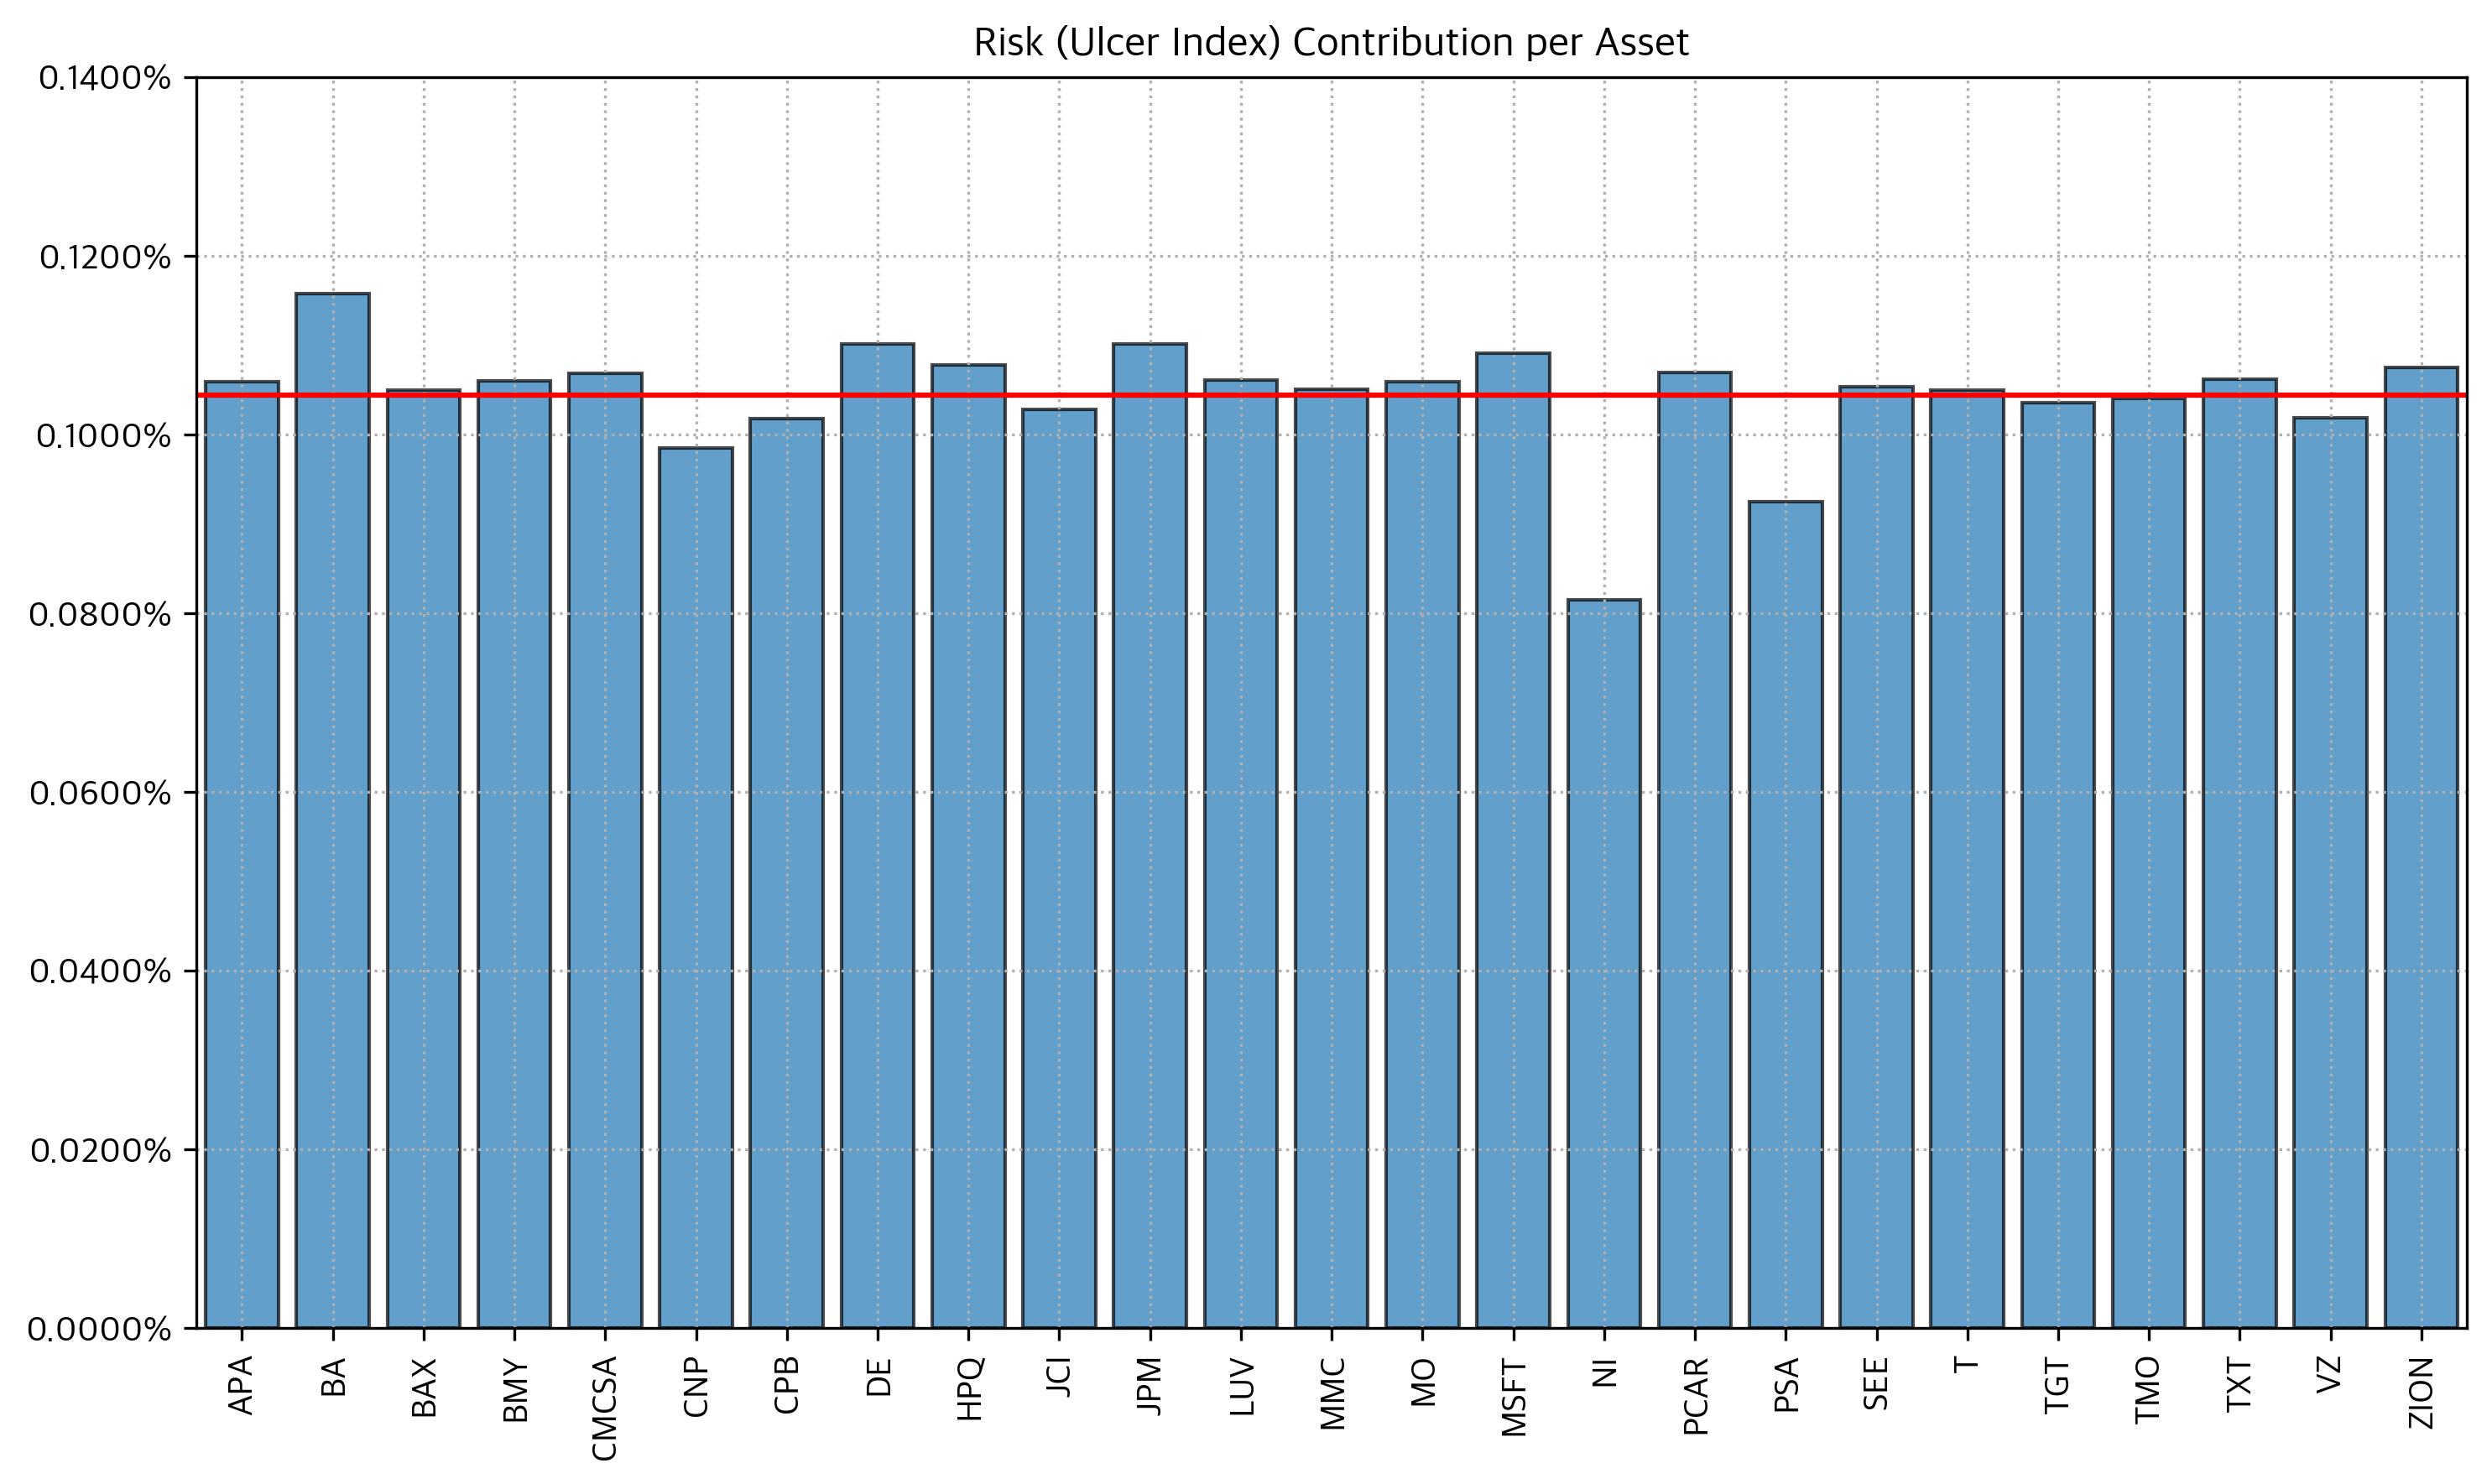

In [10]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)